<a href="https://colab.research.google.com/github/KennethVA/KennethVA/blob/main/Numerical_Integration_of_Exponential_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration of Exponential growth

***

# The Forward Euler Method

Developing simple ways to solve ordinary differential equations has long been an area of intense research. While deriving the analytical solution may be simple in some cases, it is often useful to solve them numerically, especially if slamming out the analytical solution will give you carpal tunnel.

While there are many ways to numerically integrate these equations, in this tutorial we will examine the Forward Euler method. Say we have an ordinary differential equation such as

$$\frac{dN}{dt} = r N(t) \tag{1}$$

as would be the case for exponential growth, where $r$ is some growth-rate constant and  $t$  is time. Rather than solving this analytically (although it is trivial), we can solve it numerically by starting at some given value of $N$, evaluating Equation (1) for a given time step $\Delta t$, and updating the new value of $N$ at this new time $t+ \Delta t$. We can phrase this mathematically as

$$N(t+ \Delta t) = N(t) + rN(t) \Delta t .\tag{2}$$

Say our initial value ($N$ at $t=0$) is  $N=10$  and $r=1$. We can take a time step $\Delta t=0.1$ and find that the change in value of $N$ is

$$\Delta N = rN\Delta t = 1. \tag{3}$$

We can then compute the new value of $N$ at time $t+\Delta t$ as

$$N(t+\Delta t) = N(t) + \Delta N = 10 + 1 = 11.\tag{4}$$

We can then take another step forward in time and repeat the process for as long as we would like. As the total time we'd like to integrate over becomes large, it becomes obvious why using a computer is a far more attractive approach than scribbling it by hand.

A major point to be wary of is the instability of this method. The error in this scales with the square of our step size. We must choose a sufficiently small step in time such that at most only one computable event must occur. For example, if we are integrating exponential growth of bacterial cells, we don't want to take time steps larger than a cell division! This requirement is known as the Courant-Friedrichs-Lewy condition and is important for many different time-marching computer simulations.

As is often the case, the best way to learn is to do. Let's give our digits some exercise and numerically integrate this exponential growth differential equation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

Let's define the parameters we need for the integration.

In [ ]:
# Initial number of cells
N_0 = 1

# Double time
t_d = 0.5  # [h]

# Growth rate
r = np.log(2) / t_d

# Total integration time
T_total = 5

# Time intervals
delta_t = 1/1000  # [h]

# Number of steps
num_steps = int(T_total / delta_t) + 1

# Initialize array for cell count
N_t = np.zeros(num_steps)
N_t[0] = N_0

Now that we have defined the parameters, we can run the forward integration. At each step, we compute the number of grown cells and add them to the existing cell count.

In [ ]:
for t in range(1, num_steps):
  # Number of new cells
  dN = r * delta_t * N_t[t-1]

  # Update cell count
  N_t[t] = N_t[t-1] + dN

That's it! Now we can plot the results. First, we define compute the time points at which we performed the numerical integration using the function `np.arange`, which just gives a list of integers up the the number given as argument.

In [ ]:
# Define x ticks
times = np.arange(num_steps) * delta_t
times

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.998e+00, 4.999e+00,
       5.000e+00])

Using the timepoints, we plot the integrated function.

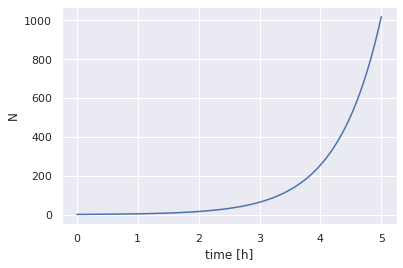

In [ ]:
plt.plot(times, N_t)
plt.xlabel("time [h]")
plt.ylabel("N");

That looks pretty exponential. Let's compare the numerical integration with the actual solution to see how accurate the approximation is.

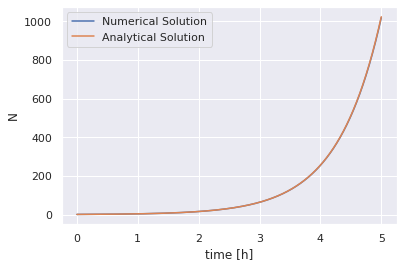

In [ ]:
# Compute analytical solution
solution = N_0 * np.exp(r * times)

# Plot both analytical solution and numerical integration
plt.plot(times, N_t, label="Numerical Solution")
plt.plot(times, solution, label="Analytical Solution")

plt.legend()
plt.xlabel("time [h]")
plt.ylabel("N");

If we have chosen a small enough time interval, then the solution will be very accurate. Try and change the time interval to see the change in accuracy when larger intervals are chosen!

## Computational Environment

In [ ]:
!pip install watermark
%load_ext watermark
%watermark -v -p  numpy,matplotlib,seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.14
IPython version      : 7.9.0

numpy     : 1.21.6
matplotlib: 3.2.2
seaborn   : 0.11.2

